# GEDI Level-4A Dataset Exploration - Part 2

In [1]:
import os
import glob
import h5py

# load files
path = os.path.join( os.getcwd(), os.path.join( 'data', 'kenya' ) )
files = glob.glob( f'{path}\\*.h5' )
hf = h5py.File( files[ 0 ], 'r')

## Review content of Beam group

In [2]:
import tabulate
from IPython.display import HTML

# get BEAM0110
beam_str = 'BEAM0110'
beam0110 = hf[beam_str]

data = []
# loop over all the variables within BEAM0110 group
for v in beam0110.keys():
    var = beam0110[v]
    source = ''
    # if the key is a subgroup assign GROUP tag
    if isinstance(var, h5py.Group):
        data.append([v, 'GROUP', 'GROUP', 'GROUP'])
    # read source, description, units attributes of each variables
    else:
        if 'source' in var.attrs.keys():
            source = var.attrs['source']
        data.append([v, var.attrs['description'], var.attrs['units'], source])

# print all variable name and attributes as a table
tbl_n = 1
print(f'Table {tbl_n}. Variables within {beam_str} group')
headers = ["variable", "description", "units", "source"]
data = sorted(data, key=lambda x:x[3])
display(HTML(tabulate.tabulate(data, headers, tablefmt='html')))

Table 1. Variables within BEAM0110 group


variable,description,units,source
agbd,Aboveground biomass density (Mg / ha),Mg / ha,
agbd_pi_lower,Lower prediction interval (see alpha attribute for the level),Mg / ha,
agbd_pi_upper,Upper prediction interval (see alpha attribute for the level),Mg / ha,
agbd_se,Aboveground biomass density (Mg / ha) prediction standard error,Mg / ha,
agbd_t,Model prediction in fit units,-,
agbd_t_se,Model prediction standard error in fit units (needed for calculation of custom prediction intervals),-,
algorithm_run_flag,The L4A algorithm is run if this flag is set to 1. This flag selects data which have sufficient waveform fidelity for AGBD estimation.,-,
l2_quality_flag,Flag identifying the most useful L2 data for biomass predictions,-,
l4_quality_flag,Flag simplifying selection of most useful biomass predictions,-,
predict_stratum,Character ID of the prediction stratum name for the 1 km cell,-,


## Ingest non-group based Beam data into DataFrame

In [3]:
import pandas as pd

def getDataFrame( group ):
    
    # iterate through values
    names, values = [], []
    for key, value in group.items():
                
        if not isinstance(value, h5py.Group):
            
            # xvar variables have 2D
            if (key.startswith('xvar')):
                for r in range(4):
                    names.append(key + '_' + str(r+1))
                    values.append(value[:, r].tolist())
            else:
                # append to list
                names.append(key)
                values.append( value[:].tolist() )

    # return pandas dataframe        
    return pd.DataFrame(map(list, zip(*values)), columns=names)

In [4]:
import numpy as np

# set shot_number as dataframe index
main_group = hf.get( 'BEAM0110' )
df = getDataFrame( main_group )
df = df.set_index('shot_number')
df = df.replace(-9999, np.nan)
df

,agbd,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,beam,channel,degrade_flag,...,selected_algorithm,selected_mode,selected_mode_flag,sensitivity,solar_elevation,surface_flag,xvar_1,xvar_2,xvar_3,xvar_4
shot_number,,,,,,,,,,,,,,,,,,,,,
19610600100123000,NaN,NaN,NaN,NaN,NaN,NaN,0,6,3,0,...,1,0,0,-35.024349,-36.783474,0,NaN,NaN,NaN,NaN
19610600100123001,NaN,NaN,NaN,NaN,NaN,NaN,0,6,3,0,...,1,0,0,-18.704603,-36.783318,0,NaN,NaN,NaN,NaN
19610600100123002,NaN,NaN,NaN,NaN,NaN,NaN,0,6,3,0,...,1,0,0,-10.860862,-36.783165,0,NaN,NaN,NaN,NaN
19610600100123003,NaN,NaN,NaN,NaN,NaN,NaN,0,6,3,0,...,1,0,0,-6.100454,-36.783012,0,NaN,NaN,NaN,NaN
19610600100123004,NaN,NaN,NaN,NaN,NaN,NaN,0,6,3,0,...,1,0,0,-14.230724,-36.782249,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610600100234147,0.970350,NaN,14.964243,3.007645,0.931549,1.640041,1,6,3,0,...,1,0,0,0.974837,3.545263,1,10.120770,0.0,0.0,0.0
19610600100234148,1.453466,NaN,16.707552,3.004701,1.140102,1.639238,1,6,3,0,...,1,0,0,0.972139,3.545668,1,10.137554,0.0,0.0,0.0
19610600100234149,1.697227,NaN,17.506447,3.003461,1.232001,1.638899,1,6,3,0,...,1,0,0,0.967883,3.546073,1,10.144950,0.0,0.0,0.0


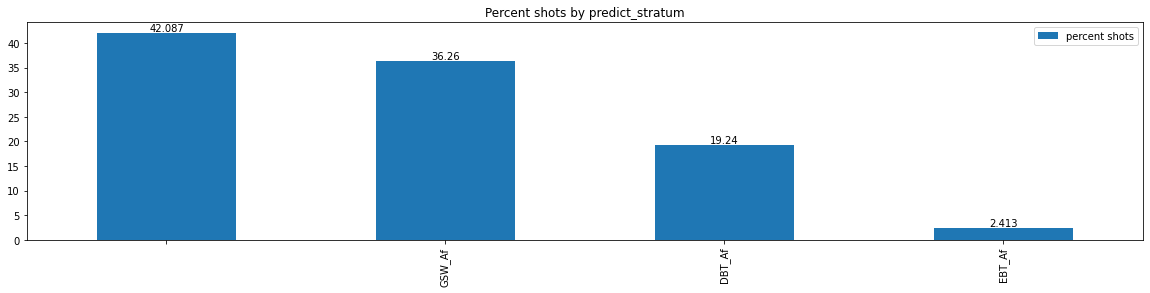

In [6]:
# percent shots in each predict_stratum
predict_stratum=df.predict_stratum.str.decode('utf-8').value_counts(normalize=True).mul(100).round(3)

# plotting the values as bar diagram
ax = predict_stratum.plot(kind='bar', figsize=(20, 4))
ax.legend(["percent shots"])
ax.set_title(f'Percent shots by predict_stratum')

# displaying values for each bar
for container in ax.containers:
    ax.bar_label(container)

## Review Land Cover sub-group parameters

In [7]:
# loop through all variables within land_cover_data subgroup
data = []
for key, value in main_group['land_cover_data'].items():
    data.append([key, value.attrs['description'], value.attrs['units']])

# print variable description as table
tbl_n += 1
print(f'Table {tbl_n}. Variables within land_cover_data group')
headers = ["variable", "description", "units"]
display(HTML(tabulate.tabulate(data, headers, tablefmt='html')))

Table 2. Variables within land_cover_data group


variable,description,units
landsat_treecover,"Tree cover in the year 2010, defined as canopy closure for all vegetation taller than 5m in height (Hansen et al.). Encoded as a percentage per output grid cell.",percent
landsat_water_persistence,The percent UMD GLAD Landsat observations with classified surface water between 2018 and 2019. Values > 80 usually represent permanent water while values < 10 represent permanent land.,percent
leaf_off_doy,GEDI 1 km EASE 2.0 grid leaf-off start day-of-year derived from the NPP VIIRS Global Land Surface Phenology Product.,days
leaf_off_flag,"GEDI 1 km EASE 2.0 grid flag derived from leaf_off_doy, leaf_on_doy and pft_class, indicating if the observation was recorded during leaf-off conditions in deciduous needleleaf or broadleaf forests and woodlands. 1 = leaf-off and 0 = leaf-on.",-
leaf_on_cycle,"Flag that indicates the vegetation growing cycle for leaf-on observations. Values are 0 (leaf-off conditions), 1 (cycle 1) or 2 (cycle 2).",-
leaf_on_doy,GEDI 1 km EASE 2.0 grid leaf-on start day-of-year derived from the NPP VIIRS Global Land Surface Phenology Product.,-
pft_class,GEDI 1 km EASE 2.0 grid Plant Functional Type (PFT) derived from the MODIS MCD12Q1v006 Product. Values follow the Land Cover Type 5 Classification scheme.,-
region_class,"GEDI 1 km EASE 2.0 grid world continental regions (0: Water, 1: Europe, 2: North Asia, 3: Australasia, 4: Africa, 5: South Asia, 6: South America, 7: North America).",-
shot_number,Shot number,-
urban_focal_window_size,The focal window size used to calculate urban_proportion. Values are 3 (3x3 pixel window size) or 5 (5x5 pixel window size).,pixels


In [8]:
lc_df = getDataFrame( main_group['land_cover_data'] )
lc_df = lc_df.set_index('shot_number')
lc_df = lc_df.replace(-9999, np.nan)
lc_df

,landsat_treecover,landsat_water_persistence,leaf_off_doy,leaf_off_flag,leaf_on_cycle,leaf_on_doy,pft_class,region_class,urban_focal_window_size,urban_proportion
shot_number,,,,,,,,,,
19610600100123000,0.0,0,9999,0,2,9999,0,0,3,0
19610600100123001,0.0,0,9999,0,2,9999,0,0,3,0
19610600100123002,0.0,0,9999,0,2,9999,0,0,3,0
19610600100123003,0.0,0,9999,0,2,9999,0,0,3,0
19610600100123004,0.0,0,9999,0,2,9999,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...
19610600100234147,9.0,0,246,0,0,191,6,4,3,0
19610600100234148,6.0,0,246,0,0,191,6,4,3,0
19610600100234149,6.0,0,246,0,0,191,6,4,3,0


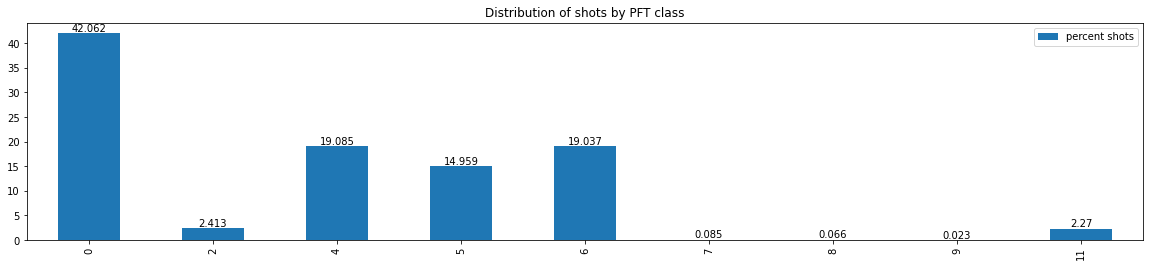

In [9]:
# percentage of shots by pft_class
pft_class=lc_df.pft_class.value_counts(normalize=True).mul(100).round(3).sort_index()

# plotting the values as bar diagram
ax = pft_class.plot(kind='bar', figsize=(20, 4))
ax.legend(["percent shots"])
ax.set_title(f'Distribution of shots by PFT class')

# displaying values for each bar
for container in ax.containers:
    ax.bar_label(container)

Distribution of shots by urban proportion


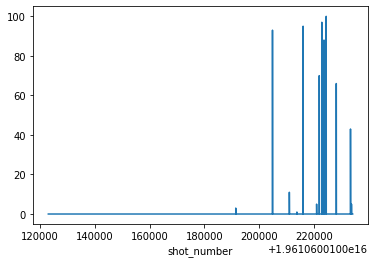

In [10]:
# percentage of shots by pft_class
lc_df.urban_proportion.plot.line()
print(f'Distribution of shots by urban proportion')

Distribution of shots by 2010 landsat tree cover


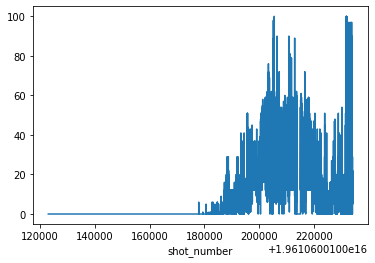

In [11]:
# plot tree cover along track
lc_df.landsat_treecover.plot.line()
print(f'Distribution of shots by 2010 landsat tree cover')

In [12]:
# use `shot_number` as a common index to join
df = df.join( lc_df )
df.columns

Index(['agbd', 'agbd_pi_lower', 'agbd_pi_upper', 'agbd_se', 'agbd_t',
       'agbd_t_se', 'algorithm_run_flag', 'beam', 'channel', 'degrade_flag',
       'delta_time', 'elev_lowestmode', 'l2_quality_flag', 'l4_quality_flag',
       'lat_lowestmode', 'lon_lowestmode', 'master_frac', 'master_int',
       'predict_stratum', 'predictor_limit_flag', 'response_limit_flag',
       'selected_algorithm', 'selected_mode', 'selected_mode_flag',
       'sensitivity', 'solar_elevation', 'surface_flag', 'xvar_1', 'xvar_2',
       'xvar_3', 'xvar_4', 'landsat_treecover', 'landsat_water_persistence',
       'leaf_off_doy', 'leaf_off_flag', 'leaf_on_cycle', 'leaf_on_doy',
       'pft_class', 'region_class', 'urban_focal_window_size',
       'urban_proportion'],
      dtype='object')

## Review Geolocation sub-group
The `geolocation` subgroup within the BEAM group contains elevation, latitude, and longitude of the lowest mode for each of the seven algorithm settings groups. Canopy height metrics are computed relative to the elevation of the [lowest mode](https://doi.org/10.5067/DOC/GEDI/GEDI_WF_ATBD.001) or the last mode of the GEDI waveform. GEDI uses six different algorithm settings (`a1` to `a6`) for webform processing (refer to the [GEDI L1/L2 Waveform Processing ATBD, Table 5](https://doi.org/10.5067/DOC/GEDI/GEDI_WF_ATBD.001) for more details). Additional algorithm settings of `a10` in GEDI L4A indicate that `a5` has been used, but the lowest detected mode is likely noise. When this occurs, a higher mode was used to calculate RH metrics (see [GEDI L4A ATBD](https://daac.ornl.gov/daacdata/gedi/GEDI_L4A_AGB_Density_V2_1/comp/GEDI_ATBD_L4A_v1.0.pdf) for details).

The `geolocation` subgroup also provides a beam sensitivity metric for each of the seven algorithm settings. The sensitivity indicates signal strength of the GEDI shot to penetrate canopies and detect the true ground level. The subgroup also includes `stale_return_flag` (0=good) to indicate the signal quality. 

In [39]:
# loop through all variables within land_cover_data subgroup
data = []
for key, value in main_group['geolocation'].items():
    data.append([key, value.attrs['description'], value.attrs['units']])

# print variable description as table
tbl_n += 1
print(f'Table {tbl_n}. Variables within geolocation group')
headers = ["variable", "description", "units"]
display(HTML(tabulate.tabulate(data, headers, tablefmt='html')))

Table 5. Variables within geolocation group


variable,description,units
elev_lowestmode_a1,Elevation of center of lowest mode relative to reference ellipsoid,m
elev_lowestmode_a10,Elevation of center of lowest mode relative to reference ellipsoid,m
elev_lowestmode_a2,Elevation of center of lowest mode relative to reference ellipsoid,m
elev_lowestmode_a3,Elevation of center of lowest mode relative to reference ellipsoid,m
elev_lowestmode_a4,Elevation of center of lowest mode relative to reference ellipsoid,m
elev_lowestmode_a5,Elevation of center of lowest mode relative to reference ellipsoid,m
elev_lowestmode_a6,Elevation of center of lowest mode relative to reference ellipsoid,m
lat_lowestmode_a1,Latitude of center of lowest mode,degrees
lat_lowestmode_a10,Latitude of center of lowest mode,degrees
lat_lowestmode_a2,Latitude of center of lowest mode,degrees


## AGBD Parameters

The agbd variable within the BEAM group contains estimated aboveground biomass density. The agbd_prediction subgroup contains AGBD variables for all 7 algorithm settings groups.

Canopy height metrics are computed relative to the elevation of the [lowest mode](https://doi.org/10.5067/DOC/GEDI/GEDI_WF_ATBD.001) or the last mode of the GEDI waveform. GEDI uses six different algorithm settings (`a1` to `a6`) for webform processing (refer to the [GEDI L1/L2 Waveform Processing ATBD, Table 5](https://doi.org/10.5067/DOC/GEDI/GEDI_WF_ATBD.001) for more details). Additional algorithm settings of `a10` in GEDI L4A indicate that `a5` has been used, but the lowest detected mode is likely noise. When this occurs, a higher mode was used to calculate RH metrics (see [GEDI L4A ATBD](https://daac.ornl.gov/daacdata/gedi/GEDI_L4A_AGB_Density_V2_1/comp/GEDI_ATBD_L4A_v1.0.pdf) for details).



In [13]:
# loop through all variables within land_cover_data subgroup
data = []
for key, value in main_group['agbd_prediction'].items():
    data.append([key, value.attrs['description'], value.attrs['units']])

# print variable description as table
tbl_n += 1
print(f'Table {tbl_n}. Variables within agbd_prediction group')
headers = ["variable", "description", "units"]
display(HTML(tabulate.tabulate(data, headers, tablefmt='html')))

Table 3. Variables within agbd_prediction group


variable,description,units
agbd_a1,Aboveground biomass density,Mg / ha
agbd_a10,Aboveground biomass density,Mg / ha
agbd_a2,Aboveground biomass density,Mg / ha
agbd_a3,Aboveground biomass density,Mg / ha
agbd_a4,Aboveground biomass density,Mg / ha
agbd_a5,Aboveground biomass density,Mg / ha
agbd_a6,Aboveground biomass density,Mg / ha
agbd_pi_lower_a1,Lower prediction interval (see alpha attribute for the level),Mg / ha
agbd_pi_lower_a10,Lower prediction interval (see alpha attribute for the level),Mg / ha
agbd_pi_lower_a2,Lower prediction interval (see alpha attribute for the level),Mg / ha


In [14]:
ap_df = getDataFrame( main_group['agbd_prediction'] )
ap_df = ap_df.set_index('shot_number')
ap_df = ap_df.replace(-9999, np.nan)
ap_df

,agbd_a1,agbd_a10,agbd_a2,agbd_a3,agbd_a4,agbd_a5,agbd_a6,agbd_pi_lower_a1,agbd_pi_lower_a10,agbd_pi_lower_a2,...,xvar_a4_3,xvar_a4_4,xvar_a5_1,xvar_a5_2,xvar_a5_3,xvar_a5_4,xvar_a6_1,xvar_a6_2,xvar_a6_3,xvar_a6_4
shot_number,,,,,,,,,,,,,,,,,,,,,
19610600100123000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19610600100123001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19610600100123002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19610600100123003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19610600100123004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610600100234147,0.970350,0.382088,0.385680,0.385680,0.919862,40.870926,0.385680,NaN,NaN,NaN,...,0.0,0.0,10.532331,0.0,0.0,0.0,10.093067,0.0,0.0,0.0
19610600100234148,1.453466,0.745361,0.742466,0.787927,1.271942,41.190556,0.787927,NaN,NaN,NaN,...,0.0,0.0,10.534230,0.0,0.0,0.0,10.113358,0.0,0.0,0.0
19610600100234149,1.697227,1.061925,1.061925,1.061925,1.453466,1.061925,1.061925,NaN,NaN,NaN,...,0.0,0.0,10.124228,0.0,0.0,0.0,10.124228,0.0,0.0,0.0


In [15]:
# use `shot_number` as a common index to join
df = df.join( ap_df )
df.columns

Index(['agbd', 'agbd_pi_lower', 'agbd_pi_upper', 'agbd_se', 'agbd_t',
       'agbd_t_se', 'algorithm_run_flag', 'beam', 'channel', 'degrade_flag',
       ...
       'xvar_a4_3', 'xvar_a4_4', 'xvar_a5_1', 'xvar_a5_2', 'xvar_a5_3',
       'xvar_a5_4', 'xvar_a6_1', 'xvar_a6_2', 'xvar_a6_3', 'xvar_a6_4'],
      dtype='object', length=174)

In [38]:
import geopandas as gpd

# convert to a geopandas dataframe for plotting
gdf = gpd.GeoDataFrame( df, geometry=gpd.points_from_xy( df.lon_lowestmode, df.lat_lowestmode))
gdf = gdf.set_crs( "EPSG:4326" )

# filter based on algorithm run flag
gdf = gdf[ gdf[ 'agbd' ].notna() ]
gdf = gdf[ gdf[ 'algorithm_run_flag' ] > 0 ]
gdf = gdf[(gdf['l2_quality_flag'] == 1) & (gdf['l4_quality_flag'] == 1)]

gdf.drop( [ 'algorithm_run_flag', 'l2_quality_flag', 'l4_quality_flag' ], axis=1 )

,agbd,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,beam,channel,degrade_flag,delta_time,...,xvar_a4_4,xvar_a5_1,xvar_a5_2,xvar_a5_3,xvar_a5_4,xvar_a6_1,xvar_a6_2,xvar_a6_3,xvar_a6_4,geometry
shot_number,,,,,,,,,,,,,,,,,,,,,
19610600100168423,1.228436,NaN,15.926882,3.005978,1.048136,1.639586,6,3,0,4.079396e+07,...,0.0,10.107918,0.0,0.0,0.0,10.107918,0.0,0.0,0.0,POINT (15.18886 -27.00495)
19610600100168426,3.454290,NaN,22.437077,2.997028,1.757603,1.637143,6,3,0,4.079396e+07,...,0.0,10.174478,0.0,0.0,0.0,10.174478,0.0,0.0,0.0,POINT (15.19000 -27.00379)
19610600100168427,1.022177,NaN,15.164469,3.007290,0.956102,1.639944,6,3,0,4.079396e+07,...,0.0,10.495237,0.0,0.0,0.0,10.096534,0.0,0.0,0.0,POINT (15.19038 -27.00341)
19610600100168428,1.075342,NaN,15.365992,3.006936,0.980651,1.639847,6,3,0,4.079396e+07,...,0.0,10.409131,0.0,0.0,0.0,10.098515,0.0,0.0,0.0,POINT (15.19076 -27.00302)
19610600100168548,0.970350,NaN,14.964243,3.007645,0.931549,1.640041,6,3,0,4.079396e+07,...,0.0,10.093067,0.0,0.0,0.0,10.093067,0.0,0.0,0.0,POINT (15.23654 -26.95675)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610600100234147,0.970350,NaN,14.964243,3.007645,0.931549,1.640041,6,3,0,4.079451e+07,...,0.0,10.532331,0.0,0.0,0.0,10.093067,0.0,0.0,0.0,POINT (36.60129 0.09590)
19610600100234148,1.453466,NaN,16.707552,3.004701,1.140102,1.639238,6,3,0,4.079451e+07,...,0.0,10.534230,0.0,0.0,0.0,10.113358,0.0,0.0,0.0,POINT (36.60159 0.09633)
19610600100234149,1.697227,NaN,17.506447,3.003461,1.232001,1.638899,6,3,0,4.079451e+07,...,0.0,10.124228,0.0,0.0,0.0,10.124228,0.0,0.0,0.0,POINT (36.60188 0.09675)


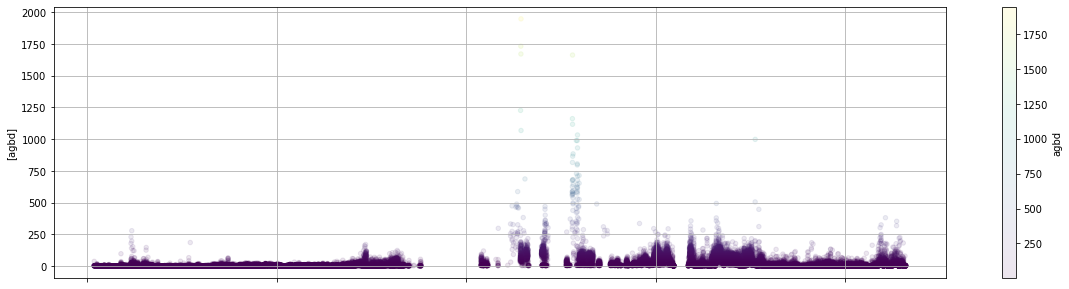

In [17]:
# plot
ax = gdf.plot.scatter(x =['lon_lowestmode'], y=['agbd'],  cmap='viridis',  c='agbd',
                           alpha=0.1, figsize=(20, 5),
                           grid=True, legend=False)

In [18]:
# read aoi - kenyan administrative boundaries
path = os.path.join( os.getcwd(), 'aois/kenya' )
country = gpd.read_file( os.path.join( path, 'county.shp' ) ) 

In [19]:
# return geometries matching name
def getCounties( names ):         
    return country[ country [ 'Name' ].isin( names ) ]

counties = getCounties( ['Kiambu', 'Laikipia', 'Nakuru', 'Nyandarua', 'Nyeri' ] )

In [20]:
# dissolve county polygons into single polygons 
counties['geometry'] = counties['geometry'].buffer(0.001)
counties = counties.dissolve( aggfunc='sum')

C:\Users\crwil\AppData\Local\Temp/ipykernel_20488/84851508.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['geometry'] = counties['geometry'].buffer(0.001)
C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
# subset 
subset = gdf[ gdf['geometry'].within( counties.geometry[0]) ]    
subset

,agbd,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,beam,channel,degrade_flag,...,xvar_a4_4,xvar_a5_1,xvar_a5_2,xvar_a5_3,xvar_a5_4,xvar_a6_1,xvar_a6_2,xvar_a6_3,xvar_a6_4,geometry
shot_number,,,,,,,,,,,,,,,,,,,,,
19610600100232397,91.197983,7.507657,267.633789,17.133297,9.050524,3.922849,1,6,3,0,...,0.0,10.689714,11.645600,0.0,0.0,10.242070,11.221408,0.0,0.0,POINT (36.07689 -0.64865)
19610600100232398,15.379188,NaN,115.168892,17.134771,3.716617,3.923018,1,6,3,0,...,0.0,9.994498,10.271319,0.0,0.0,9.996499,10.273266,0.0,0.0,POINT (36.07719 -0.64823)
19610600100232399,133.411438,22.495375,337.010468,17.121750,10.946559,3.921527,1,6,3,0,...,0.0,10.503809,11.189281,0.0,0.0,10.519981,11.189281,0.0,0.0,POINT (36.07749 -0.64781)
19610600100232400,178.781525,43.083279,407.153961,17.120127,12.671920,3.921341,1,6,3,0,...,0.0,10.717742,11.300885,0.0,0.0,10.726136,11.302654,0.0,0.0,POINT (36.07779 -0.64739)
19610600100232401,167.667282,37.703716,390.336945,17.126013,12.271715,3.922015,1,6,3,0,...,0.0,10.966312,11.825819,0.0,0.0,10.837435,11.700000,0.0,0.0,POINT (36.07808 -0.64696)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610600100234147,0.970350,NaN,14.964243,3.007645,0.931549,1.640041,1,6,3,0,...,0.0,10.532331,0.000000,0.0,0.0,10.093067,0.000000,0.0,0.0,POINT (36.60129 0.09590)
19610600100234148,1.453466,NaN,16.707552,3.004701,1.140102,1.639238,1,6,3,0,...,0.0,10.534230,0.000000,0.0,0.0,10.113358,0.000000,0.0,0.0,POINT (36.60159 0.09633)
19610600100234149,1.697227,NaN,17.506447,3.003461,1.232001,1.638899,1,6,3,0,...,0.0,10.124228,0.000000,0.0,0.0,10.124228,0.000000,0.0,0.0,POINT (36.60188 0.09675)


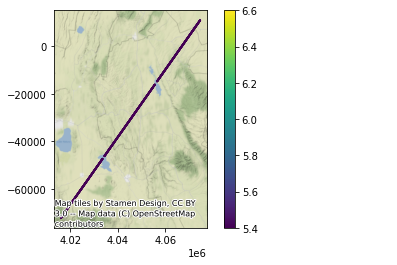

In [22]:
import contextily as ctx
import matplotlib.pyplot as plt

# plot subset for full area
ax = subset.to_crs(3857).plot( column='beam', legend=True, markersize=1 )
ctx.add_basemap( ax )

C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


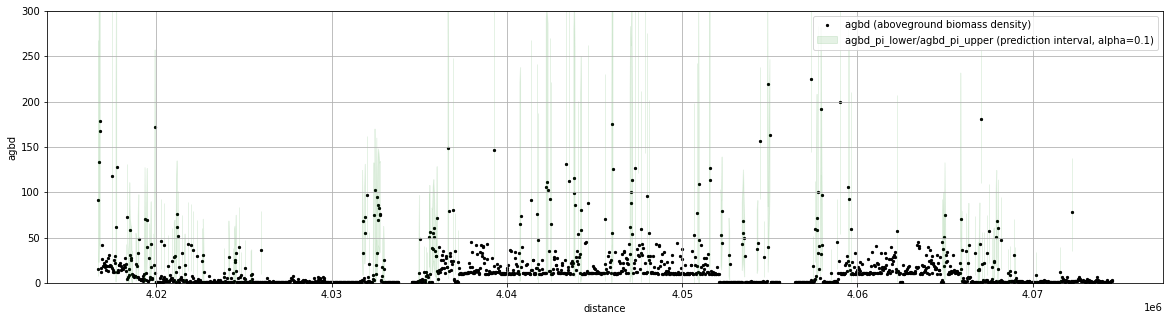

In [23]:
# compute the distance from the first point
subset['distance'] = subset.to_crs(3857).geometry.distance(subset.iloc[0].geometry)

# plotting agbd
ax = subset.plot.scatter(x ='distance', y='agbd', s=5,
                        figsize=(20, 5), grid=True, color='black', 
                             label="agbd (aboveground biomass density)")


# getting alpha attribute from the agbd_prediction group
alpha =  main_group['agbd_prediction'].attrs['alpha'] 

# plotting agbd_pi_upper/lower as fill area
ax.fill_between(subset['distance'],  subset['agbd_pi_lower'], subset['agbd_pi_upper'], 
                alpha=0.1, color='green', 
                label="agbd_pi_lower/agbd_pi_upper (prediction interval, alpha=" + str(alpha) + ")" )

plt.ylim(0, 300)
ax.legend()

The `agbd` shows the selected aboveground biomass density, shown by black dots above. The upper and lower prediction intervals are shown with a green-filled area.

The above plot shows the AGBD estimates at alpha=0.1 (90% confidence interval), the default confidence interval used for these variables. To compute the estimates at a different confidence interval (e.g., 95%), we can use `agbd_t` and `agbd_t_se` variables, which provides the prediction in transform space. For more details, please refer to [GEDI L4A Common Queries](https://daac.ornl.gov/daacdata/gedi/GEDI_L4A_AGB_Density_V2_1/comp/GEDI_L4A_V2_Common_Queries.pdf).

In [24]:
# read model_data subgroup
ancillary = hf['ANCILLARY']
model_data = ancillary['model_data']

# initialize an empty dataframe
model_data_df = pd.DataFrame()
# loop through parameters
for v in model_data.dtype.names:
    # exclude multidimensional variables
    if (len(model_data[v].shape) == 1):
        # copy parameters as dataframe column
        model_data_df[v] = model_data[v]
        # converting object datatype to string
        if model_data_df[v].dtype.kind=='O':
            model_data_df[v] = model_data_df[v].str.decode('utf-8') 

# print the parameters
tbl_n += 1
print(f'Table {tbl_n}. Parameters and their values in `model_data` subgroup')
model_data_df


Table 4. Parameters and their values in `model_data` subgroup


,predict_stratum,model_group,model_name,model_id,x_transform,y_transform,bias_correction_name,fit_stratum,rse,dof,response_max_value,bias_correction_value,npar
0,DBT_Af,4,DBT_Af,3,sqrt,sqrt,Snowdon,DBT_Af,1.950498,487,386.758881,1.092463,3
1,DBT_Au,4,EBT_Au,1,sqrt,sqrt,Snowdon,EBT_Au,2.923645,210,830.582031,1.017920,3
2,DBT_Eu,4,DBT_Eu,1,sqrt,sqrt,Snowdon,Eu,2.818270,747,724.057983,0.962632,3
3,DBT_NAs,4,DBT_coarse,1,sqrt,sqrt,Snowdon,DBT,2.661183,1695,724.057983,1.016632,3
4,DBT_SA,4,EBT_SA,1,sqrt,sqrt,Snowdon,EBT_SA,3.439619,3438,1578.000000,1.105528,3
5,DBT_SAs,4,EBT_coarse,1,sqrt,sqrt,Snowdon,EBT,3.920913,4811,1578.000000,1.113366,3
6,DBT_NAm,4,DBT_NAm,1,sqrt,sqrt,Snowdon,NAm,3.126976,2279,1768.699341,1.052422,3
7,EBT_Af,4,EBT_Af,1,sqrt,sqrt,Snowdon,EBT,3.920913,4811,1578.000000,1.113366,3
8,EBT_Au,4,EBT_Au,1,sqrt,sqrt,Snowdon,EBT_Au,2.923645,210,830.582031,1.017920,3
9,EBT_Eu,4,DBT_Eu,1,sqrt,sqrt,Snowdon,Eu,2.818270,747,724.057983,0.962632,3


In [25]:
# degree of freedom for shots
subset['predict_stratum'] = subset['predict_stratum'].str.decode('utf-8')

C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [27]:
# 99% confidence interval
alpha_2 = 0.01

for i, row in subset.iterrows():

    # model_data_df dataframe from Section 4 above contains ancillary variables
    dof = model_data_df[model_data_df['predict_stratum']==row['predict_stratum']].dof.item()
    bias = model_data_df[model_data_df['predict_stratum']==row['predict_stratum']].bias_correction_value.item()
    subset.at[i,'dof']=dof
    subset.at[i,'bias_correction_value']=bias

subset

C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,agbd,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,beam,channel,degrade_flag,...,xvar_a5_3,xvar_a5_4,xvar_a6_1,xvar_a6_2,xvar_a6_3,xvar_a6_4,geometry,distance,dof,bias_correction_value
shot_number,,,,,,,,,,,,,,,,,,,,,
19610600100232397,91.197983,7.507657,267.633789,17.133297,9.050524,3.922849,1,6,3,0,...,0.0,0.0,10.242070,11.221408,0.0,0.0,POINT (36.07689 -0.64865),4.016674e+06,4811.0,1.113366
19610600100232398,15.379188,NaN,115.168892,17.134771,3.716617,3.923018,1,6,3,0,...,0.0,0.0,9.996499,10.273266,0.0,0.0,POINT (36.07719 -0.64823),4.016707e+06,4811.0,1.113366
19610600100232399,133.411438,22.495375,337.010468,17.121750,10.946559,3.921527,1,6,3,0,...,0.0,0.0,10.519981,11.189281,0.0,0.0,POINT (36.07749 -0.64781),4.016739e+06,4811.0,1.113366
19610600100232400,178.781525,43.083279,407.153961,17.120127,12.671920,3.921341,1,6,3,0,...,0.0,0.0,10.726136,11.302654,0.0,0.0,POINT (36.07779 -0.64739),4.016771e+06,4811.0,1.113366
19610600100232401,167.667282,37.703716,390.336945,17.126013,12.271715,3.922015,1,6,3,0,...,0.0,0.0,10.837435,11.700000,0.0,0.0,POINT (36.07808 -0.64696),4.016804e+06,4811.0,1.113366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610600100234147,0.970350,NaN,14.964243,3.007645,0.931549,1.640041,1,6,3,0,...,0.0,0.0,10.093067,0.000000,0.0,0.0,POINT (36.60129 0.09590),4.074415e+06,87.0,1.118195
19610600100234148,1.453466,NaN,16.707552,3.004701,1.140102,1.639238,1,6,3,0,...,0.0,0.0,10.113358,0.000000,0.0,0.0,POINT (36.60159 0.09633),4.074448e+06,87.0,1.118195
19610600100234149,1.697227,NaN,17.506447,3.003461,1.232001,1.638899,1,6,3,0,...,0.0,0.0,10.124228,0.000000,0.0,0.0,POINT (36.60188 0.09675),4.074481e+06,87.0,1.118195


In [29]:
from scipy import stats

subset['agbd_pi_lower_2'] = (subset['agbd_t'] - \
                                  (subset['agbd_t_se'] * stats.t.ppf(1-(alpha_2/2), subset['dof'])))**2 * \
                                    subset['bias_correction_value']
subset['agbd_pi_upper_2'] = (subset['agbd_t'] + \
                                  (subset['agbd_t_se'] * stats.t.ppf(1-(alpha_2/2), subset['dof'])))**2 * \
                                    subset['bias_correction_value']

C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


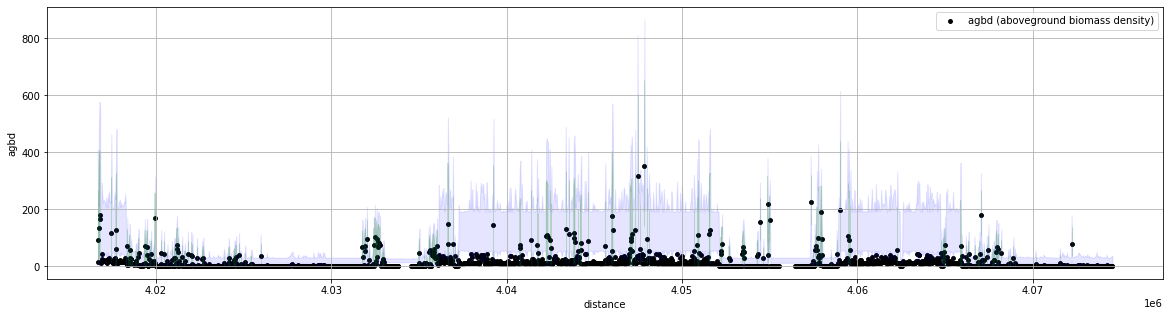

In [32]:
# plotting agbd
ax = subset.plot.scatter(x ='distance', y='agbd', s=15, 
                        figsize=(20, 5), grid=True, color='black', 
                             label="agbd (aboveground biomass density)")

# getting alpha attribute from the agbd_prediction group
alpha =  main_group['agbd_prediction'].attrs['alpha'] 
# plotting agbd_pi_upper/lower as fill area

ax.fill_between( subset['distance'],  subset['agbd_pi_lower_2'], subset['agbd_pi_upper_2'], 
                alpha=0.1, color='blue' )
ax.fill_between(subset['distance'],  subset['agbd_pi_lower'], subset['agbd_pi_upper'], 
                alpha=0.2, color='green' )

The subgroup `agbd_prediction` provides AGBD estimates for all seven algorithm settings groups (a1-6 and a10)

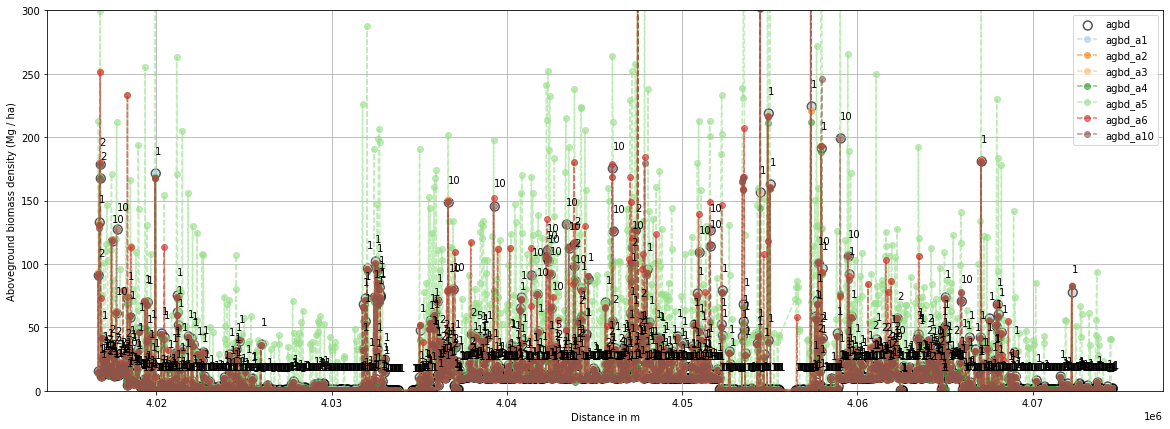

In [34]:
from matplotlib import cm
cmap = cm.get_cmap('tab20')

## x, y labels
ylabel = main_group['agbd'].attrs['long_name'] + ' (' + main_group['agbd'].attrs['units'] + ')'
xlabel = 'Distance in m'

# plotting agbd
ax = subset.plot.scatter(x ='distance', y='agbd', s=100, ylabel=ylabel, xlabel=xlabel,
                        figsize=(20, 7), grid=True, marker = "$\u25EF$", alpha=0.5, color='black',
                             label="agbd")

l2a_alg_count =  main_group['agbd_prediction'].attrs['l2a_alg_count'] 
for i in range(l2a_alg_count):

    if i == 6:
        i = 10
    else:
        i += 1
        
    agbd_aN = 'agbd_a' +  str(i)

    # plotting agbd
    subset.plot.line(ax=ax, x ='distance', y=agbd_aN, ylabel=ylabel, xlabel=xlabel,
                            figsize=(20, 7), grid=True, color=cmap(i), style='--o', alpha=0.6,
                                 label=agbd_aN)
    
for i, row in subset.iterrows():
    ax.annotate(row["selected_algorithm"], (row["distance"],row["agbd"]+15))

plt.ylim(0, 300)
ax.legend()